## Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file train.csv.

The company is looking at prospective properties to buy to enter the market. Objective is to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

    Which variables are significant in predicting the price of a house, and

    How well those variables describe the price of a house.

 

Also, the optimal value of lambda for ridge and lasso regression needs to be determined.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
def countplot(features):
    plt.figure(figsize=(16, 8))
    for i in range(1,len(features)+1):
        plt.subplot(2,4,i)
        plt.xticks(rotation=90)
        sns.countplot(x = features[i-1], data = housing)    
    plt.show()


In [3]:
pd.set_option('display.max_columns',None)
housing = pd.read_csv("train.csv")
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#Understanding data
print(housing.shape)
print(housing.info(verbose=True,null_counts=True))
print(housing.describe())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

In [5]:
print("Percentage of missing values in each column")
print(round(100*(housing.isnull().sum()/len(housing)), 2).sort_values(ascending=False))
print("=================================")
print("Percentage of missing values in each row")
print(round((housing.isnull().sum(axis=1)/len(housing))*100,2).sort_values(ascending=False))
print("Number of duplicate rows: ",len(housing[housing.duplicated()]))

Percentage of missing values in each column
PoolQC           99.52
MiscFeature      96.30
Alley            93.77
Fence            80.75
FireplaceQu      47.26
LotFrontage      17.74
GarageCond        5.55
GarageType        5.55
GarageYrBlt       5.55
GarageFinish      5.55
GarageQual        5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Utilities         0.00
YearRemodAdd      0.00
MSSubClass        0.00
Foundation        0.00
ExterCond         0.00
ExterQual         0.00
Exterior2nd       0.00
Exterior1st       0.00
RoofMatl          0.00
RoofStyle         0.00
YearBuilt         0.00
LotConfig         0.00
OverallCond       0.00
OverallQual       0.00
HouseStyle        0.00
BldgType          0.00
Condition2        0.00
BsmtFinSF1        0.00
MSZoning          0.00
LotArea           0.00
Street            0.00
Condition1        0.00
Neighborhood 

It can be observed that the columns ['Alley','PoolQC', 'Fence', 'MiscFeature'] have more thsn 40% of missing values. So dropping them below

In [6]:
# Dropping columns which have high missing values
housing.drop(['Alley','PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], axis=1, inplace = True)

In [7]:
# Dropping id column since it is just for serial number
housing.drop('Id', axis=1, inplace = True)
housing.shape

(1460, 75)

In [8]:
print("Percentage of missing values in each column")
print(round(100*(housing.isnull().sum()/len(housing)), 2).sort_values(ascending=False))

Percentage of missing values in each column
LotFrontage      17.74
GarageType        5.55
GarageYrBlt       5.55
GarageCond        5.55
GarageQual        5.55
GarageFinish      5.55
BsmtExposure      2.60
BsmtFinType2      2.60
BsmtFinType1      2.53
BsmtCond          2.53
BsmtQual          2.53
MasVnrArea        0.55
MasVnrType        0.55
Electrical        0.07
Exterior1st       0.00
RoofMatl          0.00
SalePrice         0.00
Exterior2nd       0.00
YearRemodAdd      0.00
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
RoofStyle         0.00
HouseStyle        0.00
YearBuilt         0.00
OverallCond       0.00
OverallQual       0.00
BldgType          0.00
Condition2        0.00
Condition1        0.00
Neighborhood      0.00
LandSlope         0.00
LotConfig         0.00
Utilities         0.00
LandContour       0.00
LotShape          0.00
Street            0.00
LotArea           0.00
MSZoning          0.00
BsmtFinSF1        0.00
Heating           0.00
BsmtFinSF2   

In [9]:
housing[['LotFrontage','GarageYrBlt','MasVnrArea']].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
GarageYrBlt,1379.0,1978.506164,24.689725,1900.0,1961.0,1980.0,2002.0,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0


In [10]:
housing[['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType', 'Electrical']].describe().T

,count,unique,top,freq
GarageCond,1379,5,TA,1326
GarageType,1379,6,Attchd,870
GarageFinish,1379,3,Unf,605
GarageQual,1379,5,TA,1311
BsmtExposure,1422,4,No,953
BsmtFinType2,1422,6,Unf,1256
BsmtFinType1,1423,6,Unf,430
BsmtCond,1423,4,TA,1311
BsmtQual,1423,4,TA,649
MasVnrType,1452,4,None,864


#### Imputing missing values

In [11]:
#Imputing numericals with mean / meadian. Replaceing with median if we observe outlier else replacing with mean

housing['LotFrontage']= housing['LotFrontage'].fillna(housing['LotFrontage'].median())
housing['MasVnrArea']= housing['MasVnrArea'].fillna(housing['MasVnrArea'].median())
housing['GarageYrBlt']= housing['GarageYrBlt'].fillna(housing['GarageYrBlt'].mean())


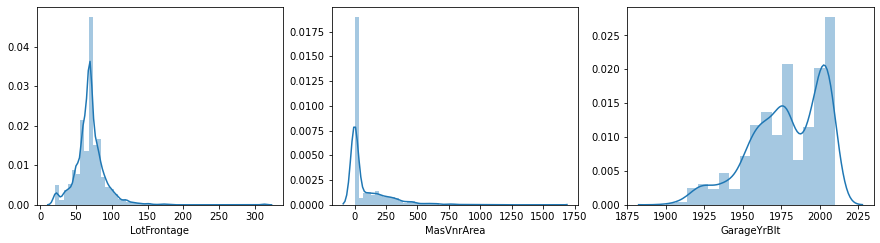

In [12]:
plt.figure(figsize=(15, 8))
plt.subplot(2,3,1)
sns.distplot(housing['LotFrontage'])
plt.subplot(2,3,2)
sns.distplot(housing['MasVnrArea'])
plt.subplot(2,3,3)
sns.distplot(housing['GarageYrBlt'])

In [13]:
## No Garage
housing['GarageType'] = housing['GarageType'].replace(np.nan, 'No Garage')
housing['GarageFinish'] = housing['GarageFinish'].replace(np.nan, 'No Garage')
housing['GarageCond'] = housing['GarageCond'].replace(np.nan, 'No Garage')
housing['GarageQual'] = housing['GarageQual'].replace(np.nan, 'No Garage')

## No Basement
housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'No Basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.nan, 'No Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.nan, 'No Basement')
housing['BsmtCond'] = housing['BsmtCond'].replace(np.nan, 'No Basement')
housing['BsmtQual'] = housing['BsmtQual'].replace(np.nan, 'No Basement')

housing['MasVnrType'] = housing['MasVnrType'].replace(np.nan, 'None') # replacing nan with the top option of this field
housing['Electrical'] = housing['Electrical'].replace(np.nan, 'SBrkr') # replacing nan with the top option of this field

#### Changing categorical values
This will help in creating dummy variables

In [14]:
#changing num to categorical so as to form these as dummy variables 
housing['MSSubClass']=housing['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

housing['OverallQual']=housing['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
housing['OverallCond']=housing['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [15]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [16]:
#### Checking missing values again
print("Percentage of missing values in each column")
print(round(100*(housing.isnull().sum()/len(housing)), 2).sort_values(ascending=False))

Percentage of missing values in each column
SalePrice        0.0
YearRemodAdd     0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
RoofStyle        0.0
YearBuilt        0.0
TotalBsmtSF      0.0
OverallCond      0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
BsmtUnfSF        0.0
Heating          0.0
SaleCondition    0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
GarageQual       0.0
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF 

Imputation of missing values is done

## Data Exploration

In [17]:
categorical = housing.select_dtypes(include=['object'])
categorical.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

The number of categorical columns are very high. Analysing them as below

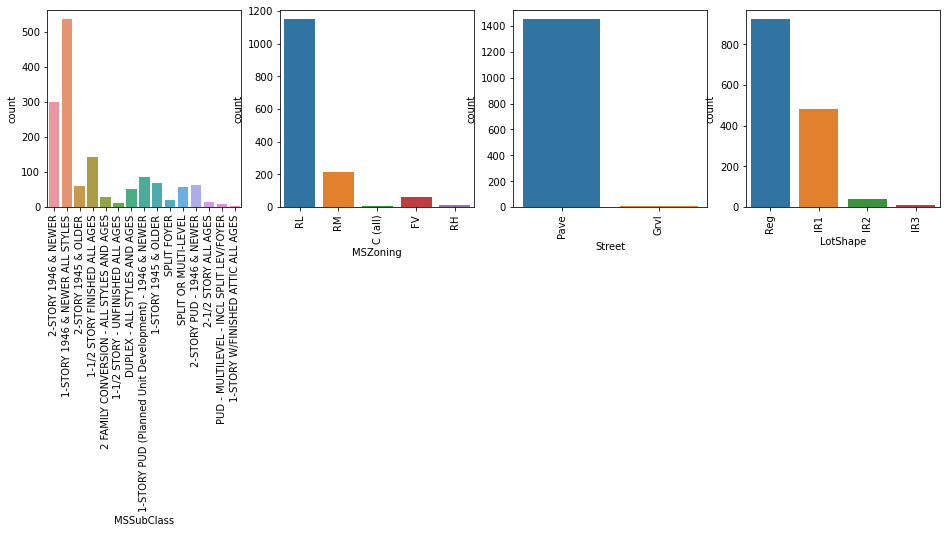

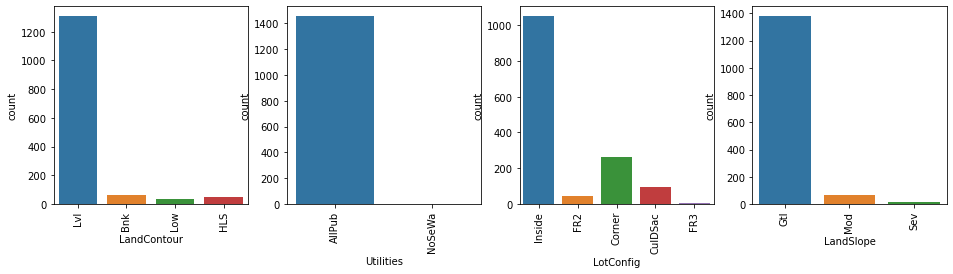

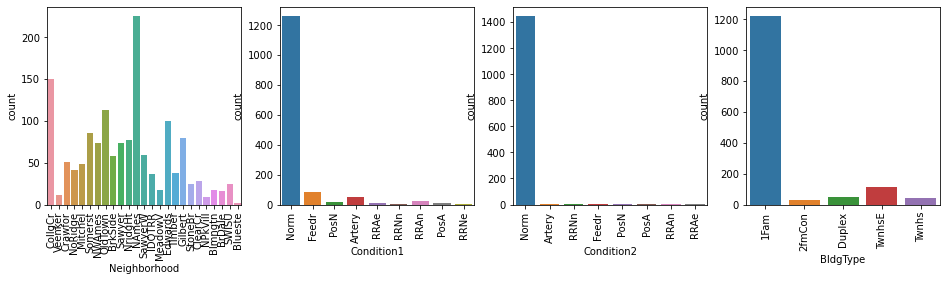

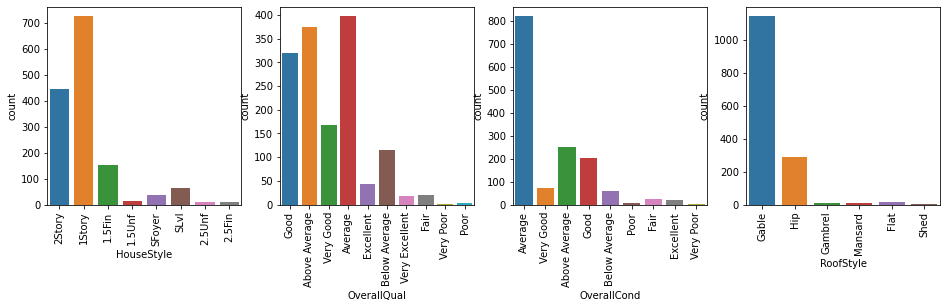

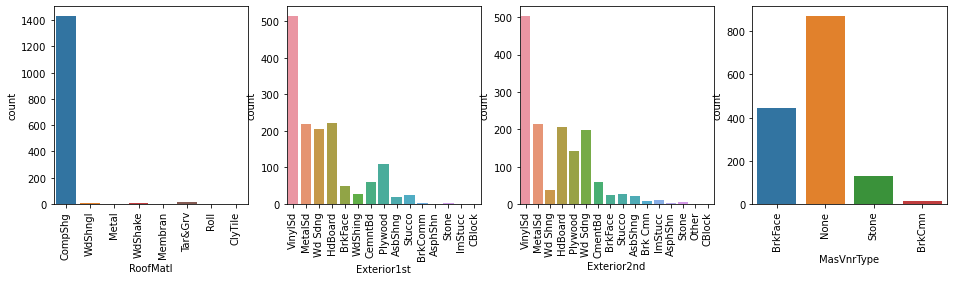

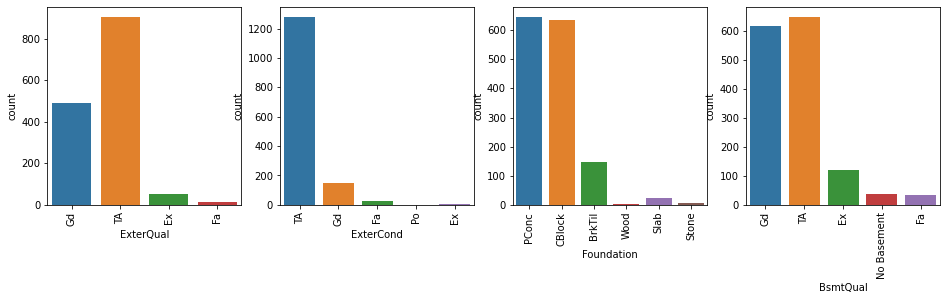

In [18]:
countplot(categorical.columns[0:4])
countplot(categorical.columns[4:8])
countplot(categorical.columns[8:12])
countplot(categorical.columns[12:16])
countplot(categorical.columns[16:20])
countplot(categorical.columns[20:24])

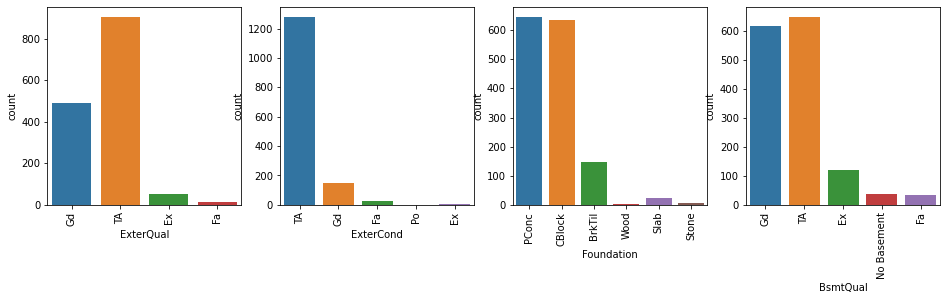

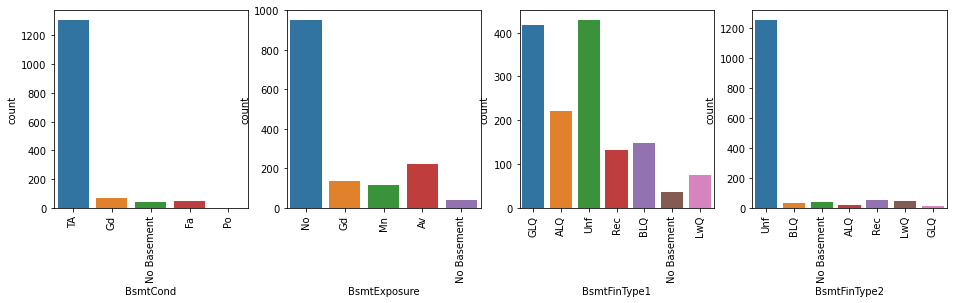

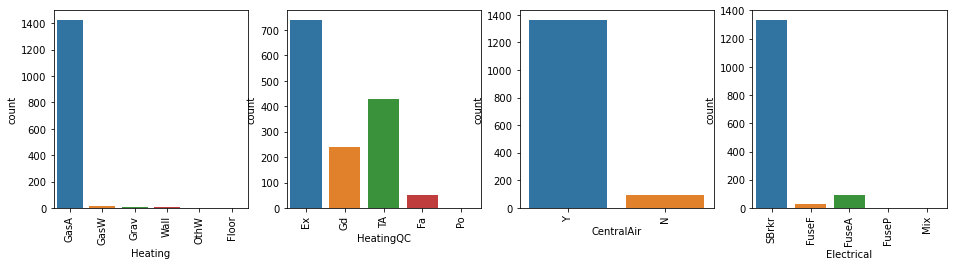

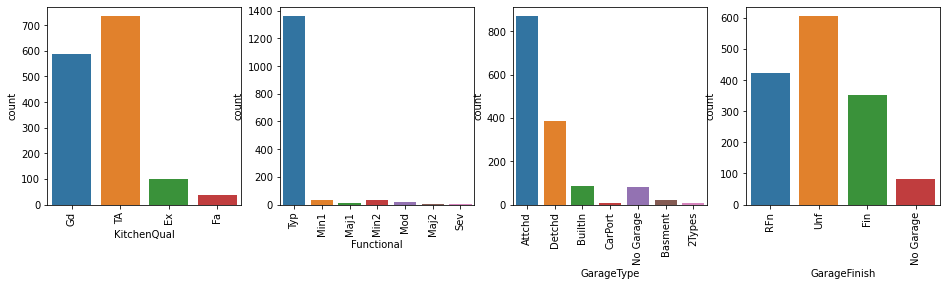

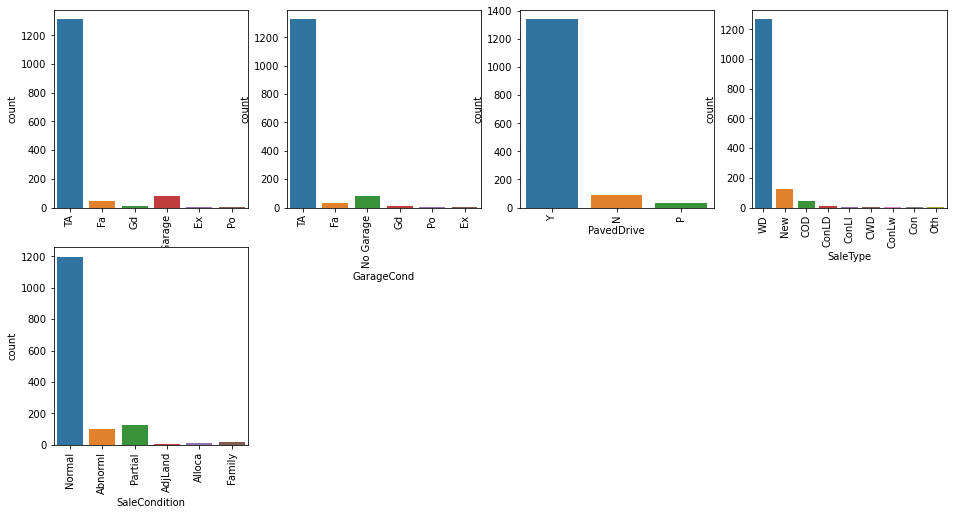

In [19]:
countplot(categorical.columns[20:24])
countplot(categorical.columns[24:28])
countplot(categorical.columns[28:32])
countplot(categorical.columns[32:36])
countplot(categorical.columns[36:])

#### Inference:
    Below columns are highly skewed and needs to be dropped
      - Functional, GarageQual,GarageCond,SaleType, CentralAir,Heating,ExterCond, RoofMatl, LandSlope,LandContour,Electrical, BsmtFinType2,PavedDrive,BsmtCond, Utilities,Street,Condition1,Condition2
  
    Below columns are moderately skewed and can be adjusted by combining minority columns together.
      - Foundation, GarageType, SaleCondition, HouseStyle, RoofStyle, Exterior1st, Exterior2nd, MSZoning

dropping highly skewed columns

In [20]:
skewedCols = ['Functional', 'GarageQual', 'GarageCond', 'SaleType', 'CentralAir', 'Heating', 'ExterCond', 'RoofMatl', 'LandSlope', 'LandContour', 'Electrical', 'BsmtFinType2', 'PavedDrive', 'BsmtCond', 'Utilities', 'Street', 'Condition1', 'Condition2']
housing.drop(skewedCols, axis=1,inplace=True)

Combining minority values to adjust skewness

In [21]:
housing['Foundation'] = housing['Foundation'].replace(['Slab','Stone','Wood'],'Others')
housing['GarageType'] = housing['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
housing['SaleCondition'] = housing['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')
housing['HouseStyle'] = housing['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')
housing['RoofStyle'] = housing['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
housing['Exterior1st'] = housing['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
housing['Exterior2nd'] = housing['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace'],'Others')
housing['MSZoning'] = housing['MSZoning'].replace(['RH','C (all)'],'Others')


### Feature Engineering

In [22]:
#### Creating new variable YearSinceRemodel
housing['YearSinceRemodel'] = 2010 - ((housing['YearRemodAdd'] - housing['YearBuilt']) + housing['YearBuilt']) 

#### Visualising Correletaion

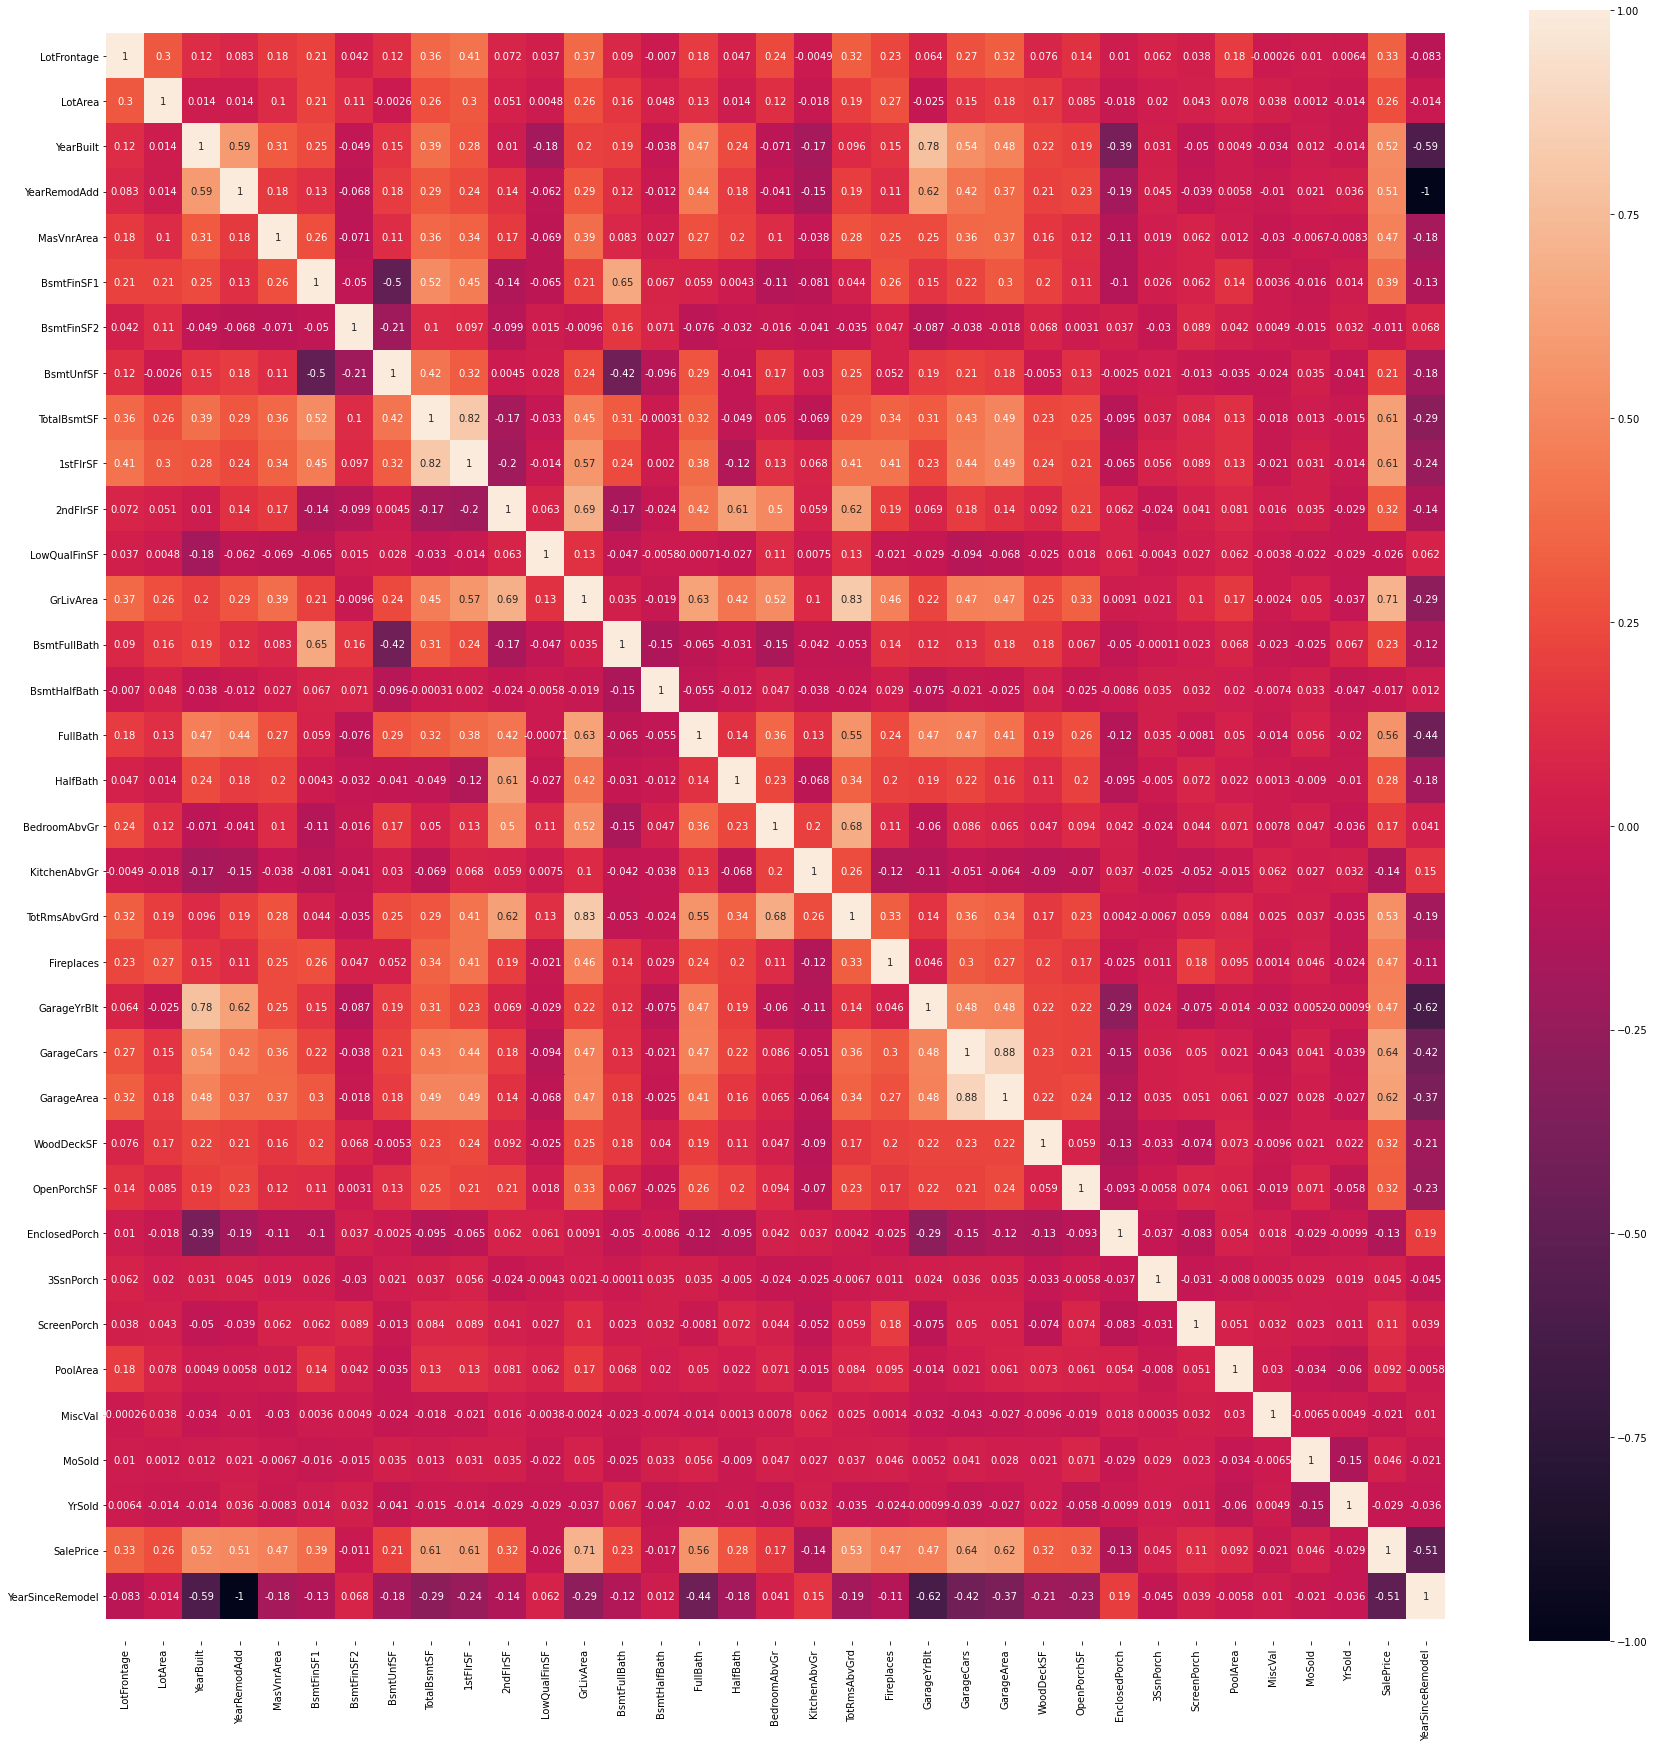

In [23]:
f, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(housing.corr(), 
            xticklabels=housing.corr().columns.values,
            yticklabels=housing.corr().columns.values,annot= True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.show()

In [24]:
corr_val = housing[list(housing.dtypes[housing.dtypes != 'object'].index)].corr()

In [25]:
corr_coef = corr_val[abs(corr_val['SalePrice']) > 0.5]['SalePrice'].sort_values(ascending=False)
print(corr_coef[1:])
corr_coef_cols = [idx for idx in corr_coef.index]

GrLivArea           0.708624
GarageCars          0.640409
GarageArea          0.623431
TotalBsmtSF         0.613581
1stFlrSF            0.605852
FullBath            0.560664
TotRmsAbvGrd        0.533723
YearBuilt           0.522897
YearRemodAdd        0.507101
YearSinceRemodel   -0.507101
Name: SalePrice, dtype: float64


Above columns have higher correlation with the target variable

#### Drawing Pair plot for the correlated features

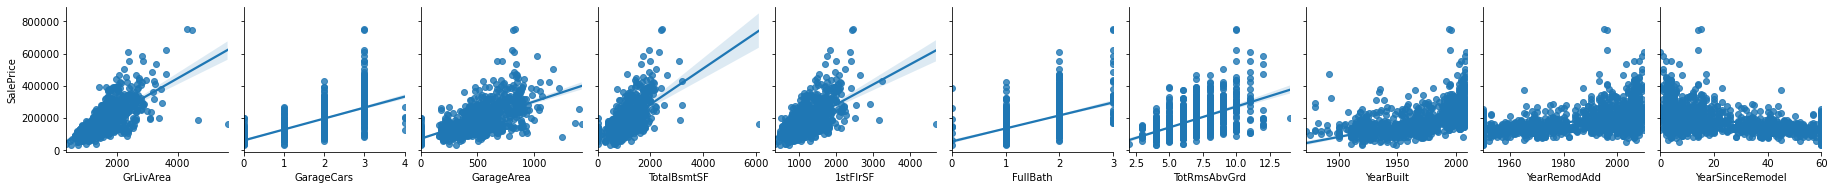

In [26]:
sns.pairplot(housing, x_vars=corr_coef_cols[1:], y_vars=[corr_coef_cols[0]], kind="reg" )

#### Distribution of dependent variable

Now let us check the distribution of the dependent variable SalePrice

In [27]:
housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

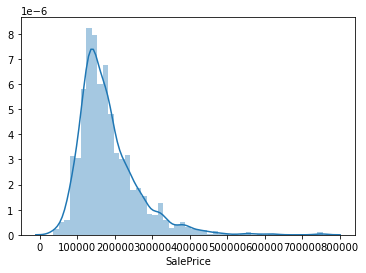

In [28]:
sns.distplot(housing['SalePrice'])

In [29]:
print("Skew Value: %f" % housing['SalePrice'].skew())

Skew Value: 1.882876


The dependent variable SalePrice is left skewed. So doing a log tranformation to form normal distribution.

In [30]:
housing['SalePrice']=np.log(housing.SalePrice)

Skew Value: 0.121335


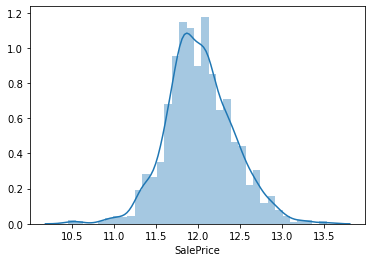

In [31]:
sns.distplot(housing['SalePrice'])
print("Skew Value: %f" % housing['SalePrice'].skew())

The dependent vartiable is now normally distributed

### Dummy Variables

Identifying categorical columns to form dummy variables

In [32]:
categorical = housing.select_dtypes(include=['object']) #checking all categorical columns to form dummy variables
categorical.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual',
       'GarageType', 'GarageFinish', 'SaleCondition'],
      dtype='object')

Identifying continuous variables

In [33]:
continuous = housing.select_dtypes(include=['int64','float64'])
continuous_vars = continuous.columns

Creating dummy variables

In [34]:
housing = pd.get_dummies(data = housing, columns = categorical.columns,drop_first=True)
housing.shape

(1460, 165)

In [35]:
housing.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247694,7,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109011,34,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317167,8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0

### Test Train Split

In [36]:
housing_train, housing_test = train_test_split(housing, train_size= 0.7, random_state=100)
print("Shape of train set: ", housing_train.shape)
print("Shape of test set: ", housing_test.shape)

Shape of train set:  (1021, 165)
Shape of test set:  (439, 165)


### Rescalling the continuous variables

In [37]:
scaler = MinMaxScaler()
housing_train[continuous_vars] = scaler.fit_transform(housing_train[continuous_vars])
housing_train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,YearSinceRemodel,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000

In [38]:
#X_train, y_train
y_train = housing_train.pop("SalePrice")
X_train = housing_train
print("Target shape: ", y_train.shape)
print("Dependent variables shape: ", X_train.shape)

Target shape:  (1021,)
Dependent variables shape:  (1021, 164)


In [39]:
housing_test[continuous_vars] = scaler.transform(housing_test[continuous_vars])

In [40]:
#X_train, y_train
y_test = housing_test.pop("SalePrice")
X_test = housing_test
print("Target shape: ", y_test.shape)
print("Dependent variables shape: ", X_test.shape)

Target shape:  (439,)
Dependent variables shape:  (439, 164)


## Model Building

Regularization using Ridge and Lesso Regression

#### Ridge Regression

In [41]:
# list of alphas to tune
ridge_params = {'alpha': [0.00004,0.0001, 0.001, 0.01, 0.1, 10,100,1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = ridge_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [4e-05, 0.0001, 0.001, 0.01, 0.1, 10, 100,
                                   1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [42]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005708,0.002380,0.003545,0.002237,4e-05,{'alpha': 4e-05},0.869766,0.781150,0.832650,0.890061,0.897171,0.854159,0.042838,6,0.925405,0.936375,0.933081,0.921172,0.919158,0.927038,0.006676
1,0.003959,0.000277,0.002273,0.000166,0.0001,{'alpha': 0.0001},0.869767,0.781152,0.832652,0.890063,0.897174,0.854162,0.042838,5,0.925405,0.936375,0.933081,0.921172,0.919158,0.927038,0.006676
2,0.003929,0.000081,0.002322,0.000184,0.001,{'alpha': 0.001},0.869793,0.781186,0.832683,0.890098,0.897227,0.854197,0.042842,4,0.925405,0.936375,0.933081,0.921172,0.919158,0.927038,0.006676
3,0.004098,0.000344,0.002358,0.000348,0.01,{'alpha': 0.01},0.870049,0.781525,0.832987,0.890410,0.897730,0.854540,0.042868,3,0.925403,0.936374,0.933079,0.921171,0.919156,0.927037,0.006676
4,0.004448,0.000612,0.002380,0.000211,0.1,{'alpha': 0.1},0.872230,0.784579,0.835540,0.892251,0.901305,0.857181,0.042762,2,0.925314,0.936294,0.932944,0.921095,0.918980,0.926926,0.006689
5,0.004411,0.000514,0.002561,0.000350,10,{'alpha': 10},0.891752,0.829287,0.843943,0.898469,0.888882,0.870466,0.028198,1,0.903212,0.915116,0.910675,0.900502,0.898232,0.905548,0.006360
6,0.004230,0.000189,0.002397,0.000380,100,{'alpha': 100},0.823434,0.761657,0.771015,0.815496,0.785156,0.791352,0.024273,7,0.807339,0.818928,0.818362,0.809229,0.806063,0.811984,0.005534


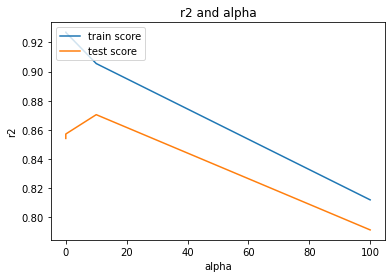

In [43]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [44]:
#optimum alpha
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.00185941,  0.02079037,  0.01979289,  0.016109  ,  0.01363771,
        0.01538394,  0.01110101,  0.02542039,  0.02660751,  0.04818682,
        0.04398281, -0.00152802,  0.05730297,  0.03227278,  0.00348847,
        0.05153144,  0.02603193,  0.02460571, -0.01492964,  0.05196114,
        0.04456967,  0.00351719,  0.04281228,  0.03325513,  0.02587122,
        0.00496321,  0.01060958,  0.00923148,  0.01619631, -0.00873218,
       -0.00357457,  0.00098246, -0.00932781, -0.016109  ,  0.00948596,
       -0.02977501,  0.01615533,  0.00015725,  0.00021776, -0.00217335,
        0.01402063,  0.01686311,  0.00141443, -0.016655  ,  0.00260976,
       -0.01244985,  0.00260264,  0.00036364, -0.02475571,  0.00557701,
       -0.00884893,  0.00868304, -0.01021792,  0.00079067,  0.01521384,
       -0.01285529, -0.00485623, -0.00157252, -0.00012465, -0.00844262,
        0.00516693,  0.01869413, -0.00518252,  0.0340229 , -0.02739822,
       -0.00780658, -0.03005779, -0.0232576 , -0.00724476, -0.00

In [45]:
print(ridge.score(X_train,y_train))

0.9048825126844456


In [46]:
print(ridge.score(X_test,y_test))

0.8762875068524612


In [47]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = housing.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 0.39),
 ('LotFrontage', -0.044),
 ('LotArea', -0.03),
 ('YearBuilt', -0.03),
 ('YearRemodAdd', -0.03),
 ('MasVnrArea', -0.027),
 ('BsmtFinSF1', -0.027),
 ('BsmtFinSF2', -0.027),
 ('BsmtUnfSF', -0.025),
 ('TotalBsmtSF', -0.023),
 ('1stFlrSF', -0.023),
 ('2ndFlrSF', -0.023),
 ('LowQualFinSF', -0.022),
 ('GrLivArea', -0.02),
 ('BsmtFullBath', -0.02),
 ('BsmtHalfBath', -0.02),
 ('FullBath', -0.02),
 ('HalfBath', -0.02),
 ('BedroomAbvGr', -0.02),
 ('KitchenAbvGr', -0.019),
 ('TotRmsAbvGrd', -0.019),
 ('Fireplaces', -0.019),
 ('GarageYrBlt', -0.018),
 ('GarageCars', -0.018),
 ('GarageArea', -0.017),
 ('WoodDeckSF', -0.016),
 ('OpenPorchSF', -0.016),
 ('EnclosedPorch', -0.016),
 ('3SsnPorch', -0.016),
 ('ScreenPorch', -0.015),
 ('PoolArea', -0.015),
 ('MiscVal', -0.015),
 ('MoSold', -0.014),
 ('YrSold', -0.013),
 ('SalePrice', -0.013),
 ('YearSinceRemodel', -0.013),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.013),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.012),
 ('MSSubClass

### Lasso

In [48]:
lasso_params = {'alpha': [0.00006,0.0006, 0.0008, 0.001, 0.002, 0.004, 0.006, 0.008 ]}
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = lasso_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [6e-05, 0.0006, 0.0008, 0.001, 0.002, 0.004,
                                   0.006, 0.008]},
             return_train_score=True, scoring='r2', verbose=1)

In [49]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(8)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.023955,0.002526,0.002640,0.000230,6e-05,{'alpha': 6e-05},0.883331,0.785302,0.839172,0.901734,0.906926,0.863293,0.045711,1,0.921632,0.933069,0.928937,0.917491,0.914719,0.923169,0.006889
1,0.006885,0.000484,0.002312,0.000144,0.0006,{'alpha': 0.0006},0.876329,0.806039,0.825216,0.881766,0.876451,0.853160,0.031301,2,0.882540,0.897214,0.891461,0.880100,0.873743,0.885012,0.008339
2,0.006791,0.000718,0.002226,0.000089,0.0008,{'alpha': 0.0008},0.866843,0.807027,0.815929,0.866720,0.858035,0.842911,0.026015,3,0.869982,0.883929,0.879083,0.866893,0.859750,0.871927,0.008633
3,0.005676,0.000657,0.002067,0.000107,0.001,{'alpha': 0.001},0.857828,0.802723,0.809197,0.850735,0.838939,0.831884,0.022106,4,0.857616,0.870901,0.867591,0.853681,0.845837,0.859125,0.009152
4,0.004427,0.000094,0.002049,0.000060,0.002,{'alpha': 0.002},0.824081,0.771037,0.768931,0.793178,0.763719,0.784189,0.022347,5,0.802391,0.810291,0.811937,0.804084,0.791604,0.804061,0.007195
5,0.004315,0.000183,0.002151,0.000100,0.004,{'alpha': 0.004},0.749694,0.691375,0.685292,0.725286,0.669181,0.704166,0.029198,6,0.709882,0.719167,0.719348,0.721757,0.710857,0.716202,0.004859
6,0.004963,0.000571,0.002376,0.000276,0.006,{'alpha': 0.006},0.665472,0.613433,0.621114,0.650957,0.591103,0.628416,0.026651,7,0.628634,0.638101,0.644047,0.638602,0.635582,0.636993,0.005009
7,0.006280,0.000648,0.002970,0.000531,0.008,{'alpha': 0.008},0.582494,0.534529,0.547523,0.575066,0.511506,0.550224,0.026120,8,0.553409,0.560615,0.564485,0.564104,0.558124,0.560147,0.004103


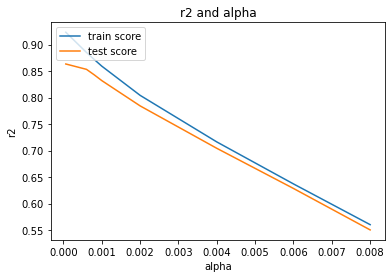

In [50]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [51]:
#optimum alpha
alpha =0.00006
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=6e-05)

In [52]:
lasso.coef_

array([-1.17731923e-02,  7.21894048e-02,  5.10948918e-02,  2.10954420e-02,
       -0.00000000e+00, -0.00000000e+00,  1.79822835e-03,  1.70334719e-02,
        0.00000000e+00,  0.00000000e+00,  1.30305151e-02, -1.33171385e-02,
        3.01749446e-01,  4.45574667e-02,  5.56300925e-03,  5.09348256e-02,
        2.28305269e-02,  1.07015841e-02, -4.99334848e-02,  3.60315756e-02,
        3.34259169e-02, -0.00000000e+00,  6.57120124e-02,  0.00000000e+00,
        2.57598915e-02, -0.00000000e+00,  2.08795553e-02,  1.60071168e-02,
        2.24394212e-02, -4.73867065e-02, -0.00000000e+00, -0.00000000e+00,
       -7.94842393e-03, -1.80264490e-03,  3.14710294e-03, -2.95301753e-02,
        1.21851776e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        9.51278511e-03,  8.38017414e-03, -6.43226737e-03, -2.19604571e-02,
        7.79197554e-03, -3.80322563e-03,  3.10086399e-03,  0.00000000e+00,
       -2.77550641e-02,  0.00000000e+00, -7.31064761e-03,  9.38002509e-03,
       -1.53602343e-02,  

In [53]:
lasso.score(X_train,y_train)

0.9178195810624109

In [54]:
lasso.score(X_test,y_test)

0.883834546544181

In [55]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = housing.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 0.344),
 ('LotFrontage', -0.135),
 ('LotArea', -0.071),
 ('YearBuilt', -0.053),
 ('YearRemodAdd', -0.05),
 ('MasVnrArea', -0.048),
 ('BsmtFinSF1', -0.047),
 ('BsmtFinSF2', -0.046),
 ('BsmtUnfSF', -0.035),
 ('TotalBsmtSF', -0.034),
 ('1stFlrSF', -0.03),
 ('2ndFlrSF', -0.029),
 ('LowQualFinSF', -0.028),
 ('GrLivArea', -0.027),
 ('BsmtFullBath', -0.027),
 ('BsmtHalfBath', -0.026),
 ('FullBath', -0.024),
 ('HalfBath', -0.024),
 ('BedroomAbvGr', -0.022),
 ('KitchenAbvGr', -0.021),
 ('TotRmsAbvGrd', -0.02),
 ('Fireplaces', -0.02),
 ('GarageYrBlt', -0.019),
 ('GarageCars', -0.019),
 ('GarageArea', -0.018),
 ('WoodDeckSF', -0.018),
 ('OpenPorchSF', -0.018),
 ('EnclosedPorch', -0.018),
 ('3SsnPorch', -0.017),
 ('ScreenPorch', -0.017),
 ('PoolArea', -0.017),
 ('MiscVal', -0.016),
 ('MoSold', -0.016),
 ('YrSold', -0.015),
 ('SalePrice', -0.014),
 ('YearSinceRemodel', -0.013),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.012),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.012),
 ('MSSu

### Conclusion

We could observe a decent score for Ridge and Lasso Regression
 ##### Ridge Regression Score:
     - Train Score : 0.9048825126844456
     - Test Score : 0.8762875068524612
     
 ##### Lasso Regression Score:
     - Train Score : 0.9178195810624109
     - Test Score : 0.883834546544181

Top 5 features using Ridge regression are:
    - 'SaleCondition_Others', 0.057
    - 'GarageFinish_RFn', 0.052
    - 'GarageFinish_Unf', 0.052
    - 'SaleCondition_Normal', 0.052
    - 'GarageFinish_No Garage', 0.048


Top 5 features using Lasso regression are:
    - ('GarageFinish_No Garage', 0.051)
    - ('GarageFinish_RFn', 0.066)
    - ('GarageFinish_Unf', 0.072)
    - ('SaleCondition_Normal', 0.074)
    - ('SaleCondition_Others', 0.302)

    Optimal Value of alpha for ridge : 10
    Optimal Value of alpha for Lasso : 0.00006

The performance of Lasso regression is better here